<a href="https://colab.research.google.com/github/VojinMK/Projekat_PPPO_IT21_2021/blob/main/PPPO_Projekat_IT21_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principi prezentacije i prepoznavanja oblika 2024/2025**
**Vojin Ćetković IT 21/2021**  
**Tema projekta**: Klasifikacija fotografija pasa  

# Sadržaj


1.   Uvod
2.   Teorijski deo
3.   Vodič kroz praktični rad
4.   Analiza dataseta
5.   Odabir tehnologija
6.   Učitavanje dataseta
7.   Praktični deo
8.   Zaključak
9.   Literatura

# Uvod
Klasifikacija predstavlja proces određivanja kojoj klasi pripada dati ulazni podatak, koji može biti u numeričkom formatu ili u vidu slika. Konkretno u našoj situaciji u fokusu su slike. Klasifikacija slika ima široku primenu u industriji i nauci, od sistema za prepoznavanje lica, preko analize medicinskih snimaka, do komericijalnih rešenja poput softvera za prepoznavanje kućnih ljubimaca (u veterinarskim stanicama).

Postoje dve osnovne metode klasifikacije slika. Prva metoda koristi ručno izvlačenje karakteristika (feature extraction), kao što su teksture, ivice ili oblici, koje zatim klasifikator koristi za određivanje klase slike. Primeri ovih tehnika su korišćenje HOG (Histogram of Oriented Gradients) ili Gabor filtera za ekstrakciju tekstura.

Druga metoda bazira se na dubokim neuronskim mrežama koje su prethodno trenirane na velikim bazama podataka, kao što su modeli VGG16, VGG19, InceptionV3 ili ResNet, MobileNetV2. Ovi modeli se mogu prilagoditi novim zadacima korišćenjem tehnike transfernog učenja (transfer learning), što omogućava efikasno treniranje i dobru generalizaciju i na manjim skupovima podataka.

Cilj projekta je razvoj modela za klasifikaciju pasa na slikama.

# Teorijski deo

Kako bi mogli da pređemo na praktični deo projekta potrebno je da prvo razradimo teorijsku osnovu na kojoj se zasniva praktični rad. U ovom delu biće objašnjeno šta je to *Deep learning* , šta je CNN. Takođe će biti i objašnjeno šta je to *transfer learning*.

*Deep learning* predstavlja granu mašinskog učenja koja se oslanja na upotrebu veštačkih neuronskih mreža sa velikim brojem slojeva. Ova tehnika omogućava računarima da uče složene obrasce i struktrue iz podataka. Posebno je efikasno u obradi slika, zvuka i teksta.

*CNN* to je arhitektura neuronskih mreža koja je namenjena obradi podataka u obliku slike. CNN modeli automatski prepoznaju i uče karakterisične obrasce sa slika, kao što su ivice, oblici i teksture, čime omogućavaju visoku tačnost u zadacima kao što je klasifikacija slika.

*Transfer learning* predstavlja prenos učenja. To je tenika u okviru dubokog učenja kojom se već trenirani modeli koriste kao polazna tačka za rešavanje novih, srodnih zadataka. Umesto da se model obučava i uči iz početka, koristi se znanje stečeno na velikim skupovima podataka (*ImageNet*), što značajno skraćuje vreme treniranja i omogućava bolje rezultate čak i kada je dostupno malo podataka za treniranje, baš kao što je slučaj sa datasetom ovog projekta.

Pošto smo pomenuli *ImageNet* u prethonom pasusu potrebno je i razjasniti šta je to *ImageNet*: to je baza podataka fotografija koja je organizovana prema *WordNet* nijerarhiji. Stotine/hiljade fotografija pripadaju svakom ćvoru u hijerarhiji.

# Vodič kroz praktični rad
U ovom delu biće objašnjen redosled rada prilikom izrade projekta:


1.   **Analiza dataseta** - u ovom delu biće proučeni podaci.
2.   **Odabir tehnologija** - ovde će biti opisane tehnologije koje će biti korišćene u projektu
3.   **Učitavanje dataseta** - biće prikazan način učitavanja podataka za analizu
4.   **Priprema podataka** - priprema učitanih podataka za dalju analizu
5.   **Kreiranje modela za klasifikaciju** - kreira se model za kvalifikaciju fotografija pasa i analizira njegova preciznost.
6.   **Testiranje modela** - testiranje modela sa novim podacima.

# Analiza dataseta

Za rad će biti korišćen set podataka koji je preuzet sa sledećeg linka:  
[Dog_Breed_Classification_2.zip](https://drive.google.com/file/d/1OaMd4t5uvBhS3EzV9tKGbd05JmNPmvaj/view)  


*Dog_Breed_Classification_2.zip* u sebi sadrži 6 foldera, svaki folder predstavlja jednu rasu pasa, fodleri su sledeći:


1.   Bedlington_terrier
2.   Bernese_mountain_dog
3.   Dandie_Dinmont
4.   Gordon_setter
5.   Ibizan_hound
6.   Norwegian_elkhound

Dataset sadrži ukupno 752 fotografije pasa.

# Odabir tehnologija

U okviru ovog projekta koristiće se metod klasifikacije putem dubokog učenja. Na početku projekta objašnjeno je šta je to duboko učenje i da on koristi već obučene modele kao što su: *VGG16/19,ResNet, MobileNetV2*..

U ovom projektu biće korišćen *MobileNetV2* kao model za *transfer learning*.
To je model koji je specijalozovan da radi na uređajima sa ograničenim resursima, što ga čini pogodnim i za brzo testiranje i takođe omogućava brzo testiranje i na manjim datasetovima.

Izabrani model ima značajno manje parametara u poređenju sa drugim modelima kao što je *VGG19* koji sam takođe pokušao da implementiram ali nije se pokazao kao najbolji za ovaj dataset. Takođe *MobilNetV2* je već unapred treniran na velikom skupu slika *ImageNet* zbog čega ga je lako moguće prilagoditi novom zadatku, isto tako i manjem zadatku kao što je ovaj, sa svega 752 slike podenljenih u 6 foldera/rasa. Ovaj model je pokazao visoku preciznost uz nisku potršnju resursa, jer njegova arhitektura omogućava transfer znanja sa velikog domena na mali domen (ovaj primer-rase pasa) koji ima svega nekoliko stotina slika.

# Učitavanje dataseta

U ovoj sekciji će biti prikazan način učitavanja podataka sa *Google Drive-a*. Da bi učitavanje dataseta sa *Google Drive*-a preko linka potrebno je instalirati biblioteku za preuzimanje fajlova sa *Drive*-a. To se radi preko komapde *!pip*. Zatim je potrebno *--id* je *id* fajla sa *Google Drive-a*. Dok *-o* predstavlja naziv pod kojim će *zip* biti sačuvan lokalno.



In [47]:
import os
!pip install -q gdown
!gdown --id 1OaMd4t5uvBhS3EzV9tKGbd05JmNPmvaj -O Dog_Breed_Classification_2.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OaMd4t5uvBhS3EzV9tKGbd05JmNPmvaj
To: /content/Dog_Breed_Classification_2.zip
100% 9.68M/9.68M [00:00<00:00, 37.4MB/s]


Zatim je potrebno raspakovati *zip* fajl u lokalni folder, koji ćemo nazvati *data*. Potebno je importovati *zipfile*.

In [48]:
import zipfile
with zipfile.ZipFile("Dog_Breed_Classification_2.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

Nakon ovoga podaci su učitani i spremni za dalje korake rada.

#Praktični deo

U ovoj sekciji biće odrađen glavni deo projekta, gde će se izvršiti sve što je potrebno za dobijanje potrebnih podataka o datasetu, od treniranja do evaluacije modela.

##Definisanje osnovnih parametara slike
Pošto je *MobileNetV2* modela kompatibilan sa unapreded treniranim dimenzijama (224x224 piksela). Potebno je slike iz dataseta konvertovati u potreban format. Da bi se povećala efikasnost i lakoća čitanja koda ovde ću definisati promenljive koje će biti korišćene u narednim koracima.*BatchSize* predstavlja broj slika koje se obrađuju u jednoj iteraciji treniranja.


In [49]:
img_height=224
img_width=224
batch_size=32

## Priprema za trening i validaciju
Ovde je potrebno kreirati instancu *ImageDataGenrator-a* za primenu i augmentaciju prilikom treniranja i validacije. Ali pre svega potrebno je importovati odgovarajuće pakete.

In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Prilikom kreiranja instance prosledićemo odgovarajuće parametre kako bi izvršili augmentaciju i sprečili *overfitting* generisanjem raznovrsnih verzija slika za treniranje rotirajući ih, pomerajući slike horizontalno i vertikalno, zumirajući, ovo radim iz razloga što imam jako malo slika i da ne bi došlo do *overfittinga* zbog toga. Ovim kodom takođe biće i rezervisano 20% podataka za validaciju. Takođe *rescale* normalizuje vrednosti pikslea, ovo je standardna praksa za neuronske mreže.

In [51]:
train_data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

Nakon što smo odradili ovaj korak potrebno je kreirati generatore za testiranje i validaciju. Prehodno kreiranu instancu *ImageDataGeneratora* *train_data_gen* nad kojom se poziva metoda *flow_from_directory* koja vrši učitavanje slika iz foldera i klasifikujući slike u klase koje odgovaraju tim folderima. Učitava podatke koje smo u ranijem koraku učitali, gde su slike pasa organizovane već po folderima. Već smo rekli da je slike potebno transformisati u 224x224 piksela zbog modela. Ovaj generator uzima 80% podataka za treniranje jer ce to već naznačeno u *train_data_gen* preko *validation_split=0.2*. *Shuffle* kao što samo ime kaže meša podatke prilikom treniranja što pomaže modelu da uči iz uzoraka u svakoj epohi.

In [52]:
train_generator=train_data_gen.flow_from_directory(
    "data/data",
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 603 images belonging to 6 classes.


Na sličan način se kreira i *validation_generator* koji služi za validaciju. Jedin razlike u odnosu na genrator za testiranje jeste u tome što je ovde *subset='validation'* što je i logično, i što je *shuffle=False*, to je urađeno da generator ne meša podatke tokom validacije, da bi evaluacija bila kozistentna.

In [53]:
validation_generator=train_data_gen.flow_from_directory(
    "data/data",
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 149 images belonging to 6 classes.


##Učitavanje i podešavanje modela
U ovom delu ćemo izvršiti učitavanje modela *MobileNetV2* koji ćemo koristiti kao *base_model*. Već smo rekli da je to unapred trenirani model za klasifikaciju slika. Da mi sve to bilo moguće uraditi u kodu naravno potreban je odgovarajući *import*.

In [54]:
from tensorflow.keras.applications import MobileNetV2

Nakon što smo importovali potrebno, možemo preći na model. Pošto je on već predtreniran, on sa sobom vuče znanje potrebno za vršenje klasifikacije, ovo je upravo *transfer_learning*. Parametrom *weights='imagenet'* model učitava te slike i tu se odvija "transfer znanja". Pomoću *include_top=False* isključujemo potpuno povezane slojeve na vrhu modela jer ćemo dodati sopstveni klasifikator, jer nema potrebe da korstimo sve te klase *imagenet-a*.. I naravno u *input_shape* definišemo 224x224 dimenzije i 3 kanala za *RGB* za ulazne slike.

In [55]:
base_model=MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height,img_width,3)
)

Već smo rekli da koristimo mogućnost transfera učenja. Iz tog razloga isključujemo mogućnost treniranja tog modela, jer da ovo ne uradimo, kada bi pozvali model.fit(...) vršilo bi se treniranje i njega, pošto nam to ne treba taj deo ćemo izostaviti, dodaćemo samo slojeve na vrh (što smo u prethodnom koraku izostavili prilikom učitavanja modela). To predstavlja standardan potez prilikom traksfera učenja kako bi se iskoristile mogućnosti i znanje.

In [56]:
base_model.trainable=False

Nakon izostavljanja tih "top" slojeva, što smo uradili u prethodnim koracima prilikom učitavanja modela, potrebno je dodati nove slojeve. Takođe da bi sve radilo potrebno je dodati nove importe.

In [57]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

Kao što smo već rekli, biće izvršeno dodavanje slojeva. Nakon što smo dodali odgovarajuće importe, možemo preći na kod.

In [58]:
model=base_model.output
model=GlobalAveragePooling2D()(model)
model=Dense(128,activation='relu')(model)
model=Dropout(0.5)(model)
predictions=Dense(train_generator.num_classes,activation='softmax')(model)

Prvo je potrebno uzeti *output* iz predtreniranog modela, tj. *MobileNetV2*. Što u suštini predstavljaju karekteristike izvučene iz slika. *GlobalAveragePooling2D* to pretvara u vektor, što čini model manje osetljivim na male prostorne promene, *Dense* taj vektor mapira na 128 neurona kroz totalno povezan sloj, ovo pomaže modelu da nauči karakteristike vezane za ovaj *dataset*. Tu takođe imamo i *relu* aktivaciju koja uvodi nelinearnost, bez njega bi model bio samo niz linearnih transformacija što bi ograničavalo njegovu sposobnost da modeluje kompleksne podatke. *Dropout* tokom treninga nasumićno isključuje 50% neurona, to se radi da bi se smanjio *overfitting*, tj. da model ne zavisi previše od specifičnih karakteristika. I na kraju imamo liniju koda koja dodaje završni potpuno povezani sloj neurona jednak broju klasa, u mom slučaju to je 6, koristeći *softmax* koja služi za dobijanje verovatnoća za svaku klasu što ujedno predstavlja i rase pasa.

Nakon dodavanja prilagođenih slojeva na "top", potrebno je kreirati novi *keras* model koji povezuje ulaz iz *base_model* sa izlazom naših slojeva *predictions*. Možemo pozvati *model.summary()* koji prikazuje strukturu modela, uključujući slojeve i broj parametara, što pomaže u proveri arhitekture pre kompajliranja.

In [59]:
from tensorflow.keras.models import Model
model=Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Kada smo to uradili, možemo preći na kompajliranje modela, što u suštini vrši konfigurisanje modela za treniranje. Ovde ćemo koristiti *Adam* optimizator sa brzinom učenja 0.0001. Taj optimizator u suštini čini učenje bržim i stablinijim, kao neki GPS koji pomaže da dođemo do cilja što bi ovde predstavljao dobar model, dok taj *learning_rate* određuje koliko velike korake model pravi kada ažurira težine. Koristićemo kategorijsku unakrsnu entropiju kao funkciju gubitka, koja je standardna za višeklasnu klasifikaciju. I na kraju ćemo pratiti tačnost tj. *accuracy* tokom treniranja i validacije.

In [60]:
from tensorflow.keras.optimizers import Adam

In [61]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Sledi treniranje modela, model se trenira koristeći podatke iz generatora. *Train_generator* iz prethodnih koraka isporučuje augmentovane slike. Model treniramo u 10 epoha jer je to pokazalo najbolje rezultate, nakon 10 epoha *val_loss* se opet povećava. I na kraju koda imamo da se validacioni podaci koriste za evaluaciju performansi modela na kraju svake epohe. Sve to smeštamo u objekat *history* koji čuva informacije o gubicima i metrikama tokom treniranja i validacije.

In [62]:
history=model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.3083 - loss: 1.7242 - val_accuracy: 0.7785 - val_loss: 1.0009
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6795 - loss: 1.0016 - val_accuracy: 0.9329 - val_loss: 0.5807
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8276 - loss: 0.6909 - val_accuracy: 0.9664 - val_loss: 0.3756
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9065 - loss: 0.4191 - val_accuracy: 0.9799 - val_loss: 0.2413
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9370 - loss: 0.2815 - val_accuracy: 0.9866 - val_loss: 0.1674
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9408 - loss: 0.2580 - val_accuracy: 0.9933 - val_loss: 0.1182
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9479 - loss: 0.2063 - val_accuracy: 0.9866 - val_loss: 0.1063
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9545 - loss: 0.2020 - val_accuracy: 0.9732 - val_loss:

Takođe ovde ćemo sačuvati model, da bi mogli da ga koristimo u koracima evaluacije i potencijalnih potrebnih provera.

In [63]:
model.save("saved_model.keras")

# Evaluacija
U ovoj sekciji ćemo izvršiti evaluaciju modela, tj. videti kako to sve radi. To ćemo prikazati putem klasifikacionog izveštaja gde ćemo videti metrike klasifikacije, konfuzionu matricu koja pokazuje koliko je model tačno ili pogrešno klasifikovao. U ovoj sekciji će biti prikazana i dva plota, jedan koji prikazuje tačnost tokom epoha i drugi koji pokazuje gubitak tokom epoha. Da bi imali i prikaz tačnosti modela koristićemo i *accuracy*.

Da bi sve to uradili potrebno je dodati potrebne importe.

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Nakon što je model istreniran izvršićemo predikciju na validacionom skupu koji je generisan u prethodnim koracima. Ovde model predviđa vertovatnoću za svaku sliku iz validacionog skupa.

In [65]:
Y_pred=model.predict(validation_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


Posle toga ćemo preko funkcije *argmax* uzeti najveću verovatnoću za svaku sliku, jer iz *Y_pred* imamo verovatnoće da li slika pripada toj klasi (za svih 6), a *argmax* će uzeti onu najveću, tj slika će biti "pridružena" klasi za koju ima najveću verovatnoću. I takođe ćemo uzeti klase iz tog validacionog generatora, stvarne klase da bi to mogli iskoristiti u klasifikacionom izveštaju.

In [66]:
y_pred=np.argmax(Y_pred,axis=1)
y_true=validation_generator.classes
print(classification_report(y_true,y_pred,target_names=validation_generator.class_indices.keys()))

                      precision    recall  f1-score   support

  Bedlington_terrier       0.96      1.00      0.98        27
Bernese_mountain_dog       1.00      1.00      1.00        26
      Dandie_Dinmont       1.00      0.96      0.98        23
       Gordon_setter       1.00      1.00      1.00        23
        Ibizan_hound       1.00      1.00      1.00        24
  Norwegian_elkhound       1.00      1.00      1.00        26

            accuracy                           0.99       149
           macro avg       0.99      0.99      0.99       149
        weighted avg       0.99      0.99      0.99       149



Na osnovu ovog klasifikacionog izveštaja viidimo da je model postigao izuzetnu preciznost prilikom klasifikovanja slika. Kao jedan od razloga za to je što rase pasa jako različite i zbog toga što su slike u validacionom skupu slične slikama iz treniranog skupa po bojama u pozadini...

Takođe, u uvodu ove sekcije rekli smo da ćemo kreirati konfuzionu matricu koja prikazuje broj tačnih i netačnih predikcija za svaku klasu.

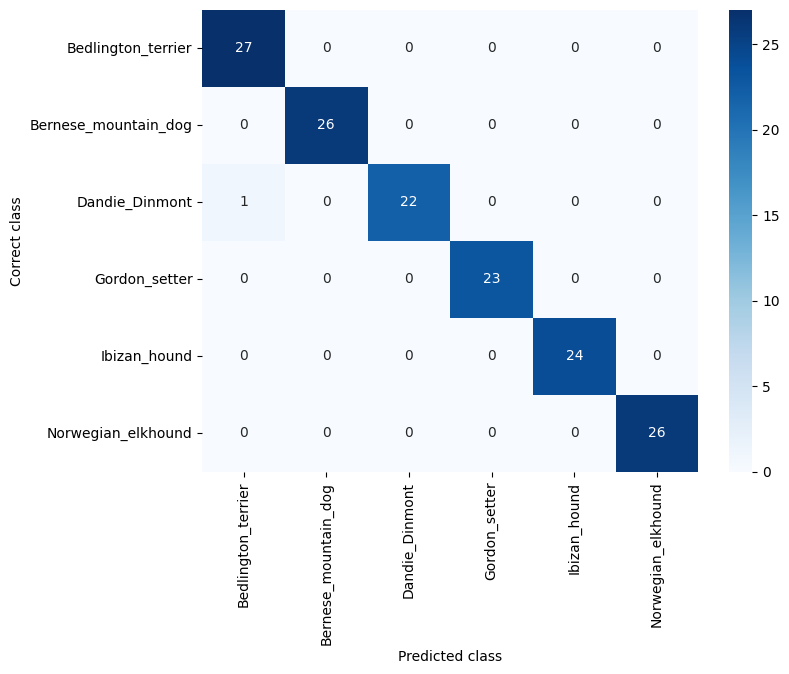

In [67]:
cm=confusion_matrix(y_true,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(
    cm,annot=True,fmt='d',
    xticklabels=validation_generator.class_indices.keys(),
    yticklabels=validation_generator.class_indices.keys(),
    cmap="Blues"
)
plt.xlabel('Predicted class')
plt.ylabel('Correct class')
plt.show()

Da bi imali i pregled tačnosti model, ovde ćemo prikazati *accuracy* modela.

In [68]:
accuracy=accuracy_score(y_true,y_pred)
print(f"Tačnost modela na validacionom skupu je: {accuracy*100:.2f}%")

Tačnost modela na validacionom skupu je: 99.33%


Tačnost modela koja se postiže izgleda nerealno, prosečna tačnost se kreće između 97 i 99 procenata. To može biti indikator *overfittinga*. Iz tog razloga potrebno je posmatrati grafika, tj. plotove preciznosti i gubitka kroz epohe. Kreiraćemo jedan po jedan. Prvo će biti kreiran plot koji prikazuje *accuracy* kroz epohe.

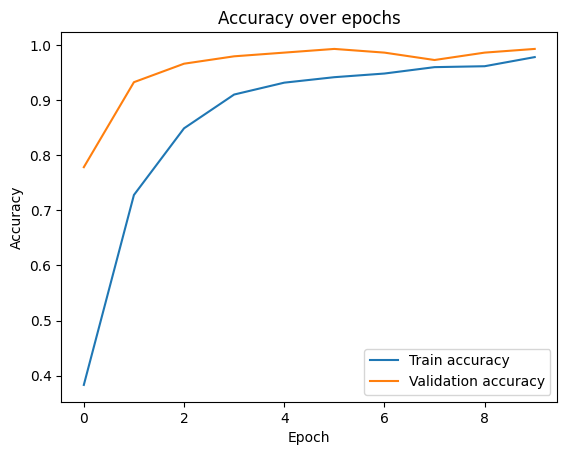

In [69]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.show()

Analizirajući ovaj plot možemo videti tok tačnosti modela po epohama pri treniranju. Već nakon nekoliko epoha model postiže visoku tačnost na validacionom skupu, dok se tačnost tokom treninga povećacva postepeno. Ovo pokazuje da je model sposoban da dobro generalizuje i da nemamo *overfitting*. Vidimo da je *transfer learning* uspešan jer model koristi prethodno naučene karakteristike i brzo se prilagođava novom zadatku.

Nakon analiziranja ovog plota, prelazimo na analiziranje plota gubitka tokom epoha.

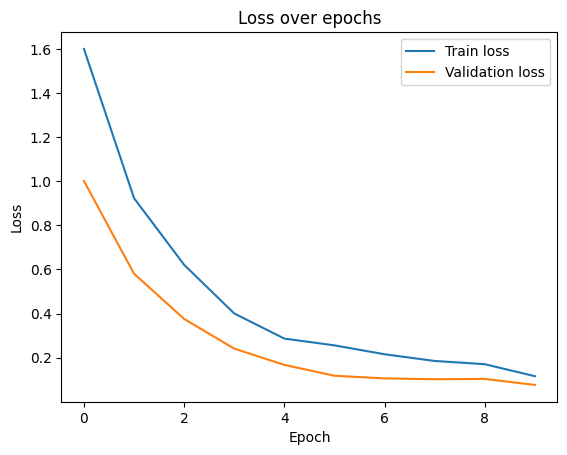

In [70]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.show()

Analizom ovog plota vidimo da i trening i validacioni gubitak opadaju tokom vremena, tj. epoha, to je znak da model uči uspešno bez znakova pretreniranja. Posebno iz razloga što se validacioni gubitak stabilizuje i ostaje nizak. Ovakov ponašanje je jako dobro kada imamo male *datasetove* i koristimo *transfer_learning*.

Pošto ovi grafikoni ne prikazuju nikakve znakove *overfittinga*, niti nekih loših stvari vezanih za model treba da pređemo na proveru duplikata slika izmedju setova slika za trening i validaciju. To može biti razlog visoke tačnosti modela.

Poenta provere duplikata je u tome da vidimo da model možda nije "napamet" naučio slike tako, što bi značilo  da nije toliko primenjiv na neke druge skupove podataka, tj. slika.

Ideja je da se svaka slika iz trening i validacionog skupa hešira i nakon toga nizove uporede i vidi se da li imamo duplikate. Potebno je importovati *hashlib* da bi bilo moguće vršiti heširanje slika.

In [71]:
import hashlib

Kada smo importovali to, potrebno je kreirati prazne skupove u koje ćemo smestiti heširane slike.

In [72]:
train_hashes=set()
validation_hashes=set()

Nakon toga treba kreirati funkciju koja će vršiti heširanje slika. Funkcija uzima putanju do slike kao argument i vraća njen heš. Takođe da bi taj heš bio "čitljiv" koristimo funkciju *hexdigesst()* koja kovertuje heš u čitljiv format.

In [73]:
def get_image_hash(image_path):
  with open(image_path, 'rb') as f:
    return hashlib.md5(f.read()).hexdigest()

Kada smo kreirali funkciju, potrebno je istu primeniti na slike iz testnog i validacionog skupa slika i te heševe smestiti u prethono kreirane skupove.

In [74]:
for i in train_generator.filepaths:
  train_hashes.add(get_image_hash(i))

for i in validation_generator.filepaths:
  validation_hashes.add(get_image_hash(i))

Posle popunjavanja tih skupova potrebno je proveriti da li postoje duplikati izmedju njih. To se radi koristeći metod *intersection* koja pronalazi presek između skupova i to smešta u *duplicates*. Na kraju je potrebno samo ispisati broj duplikata koji će nam pomoći da dodatno razmotrimo kvalitet treniranog modela.

In [75]:
duplicates=train_hashes.intersection(validation_hashes)
print(f"Broj duplikata između trening i validacionog seta je: {len(duplicates)}")

Broj duplikata između trening i validacionog seta je: 0


Na osnovu ove provere zakljućeno je da nema duplikata izmedju trening i validacionog seta slika, što znači da su podaci korektno podeljeni. Time se potvrđuje da visoka validaciona tačnost nije posledica memorisanja slika ni *overfittinga*, već da model uspešno generalizuje i razlikuje vizuelno rase pasa.

# Testiranje modela na novim slikama sa interneta

Pošto je model pokazao izuzetno visok rezultat generalizacije i učenja na validacionom skupu od 149 slika i pošto smo analizom grafikona i duplikata utvrdili da nema znatnih problema prilikom generalizacije i da nema znatnog *overfittinga* izvršićemo testiranje modela pomoću slika sa interneta. Slike će biti birane tako da se razlikuju od slika iz dataseta (pozadina, "samo pas na slici"...) da bi videli da li model radi dobar posao.

Da bi to uspeli da uradimo potrebno je da importujemo par biblioteka koje će nam omogućiti dalji rad.

In [76]:
import requests
from PIL import Image
from io import BytesIO
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

*Requests* nam omogućava da preuzmemo sliku sa interneta putem *URL*-a, dok *PIL.Image* učitava i manipuliše slikom, njenom veličinom i formatom. *BytesIO* pretvara bajtove preuzete slike u memorijski tok za obradu, dok *preprocess_input* normalizuje vrednosti piksela da bi sve bilo kompatiblino sa *MobileNetV2* modelom. I poslednja pretvara sliku u niz kao što samo ime kaže.

Nakon toga potebno je učitati sačuvani model da bi mogli da ga koristimo za predikciju. Takođe potrebno je i povući imena klasa kako bi kasnije to koristili u kodu da napišemo ime klase za koju je predikcija najveća.

In [77]:
model=tf.keras.models.load_model("saved_model.keras")
class_names=list(train_generator.class_indices.keys())

Potrebno je takođe kreirati i rečnik gde će *key* biti rasa psa a *value* *URL* do slike psa te rase.

In [78]:
test_images = {
    'Bedlington_terrier': 'https://media.gettyimages.com/id/165223561/photo/parrot-041501-kirby-a-bedlington-terrier-had-his-own-easter-parade-in-bluffers-park-he-met-up.jpg?s=1024x1024&w=gi&k=20&c=9IkD6dxu3bTOV6qx8lfFris3VefAGqZFWbQRD-e5Gyg=',
    'Bernese_mountain_dog': 'http://cdn.akc.org/Bernese-HERDING.jpg',
    'Dandie_Dinmont': 'https://ichef.bbci.co.uk/news/1024/cpsprodpb/13706/production/_106622697_callumbyjohnemms.jpg.webp',
    'Gordon_setter': 'https://cdn-fastly.petguide.com/media/2022/02/28/8263267/gordon-setter.jpg?size=720x845&nocrop=1',
    'Ibizan_hound': 'https://jtworkshop.co.uk/cdn/shop/products/IbizanHound_720x.jpg?v=1680975250',
    'Norwegian_elkhound': 'https://cdn.greenfieldpuppies.com/wp-content/uploads/2021/05/norwegian-elkhound-puppy-800x800.jpg'
}

Nakon što smo kreirali rečnik, potrebno je proći kroz sve elemente tog rečnika. To ćemo uraditi uz pomoć *for*-a. Takođe kod ćemo "obmotati" *try-catch* blokom u slučaju da neki *url* nije dobar, što može biti slučaj kada se zahteva neka dodatna kontrola da bi se dobila slika.

Za svaku sliku iz rečnika vršiće se prvo njeno pribavljanje sa unetom *url*-a, zatim je potrebno izvršiti transformaciju slike u format koji model očekuje. Slika će biti postavljena na dimenzije 224x224, takođe potrebno je putem *np.expand_dims* dodati dimenziju koja predstavlja batch jer model to očekuje pa će to konačno biti ovako (1,224,224,3).

Kada se odradi to biće izvršena procena kojoj klasi slika pripada, tu će se koristiti *np.argmax* čiji rad smo već opisali u prethodnim sekcijama.

Na kraju *try* bloka biće prikazana slika kao i podaci o tome šta je prava klasa a šta je model predvideo.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


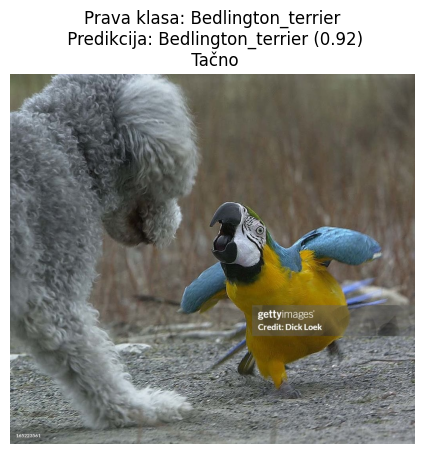

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


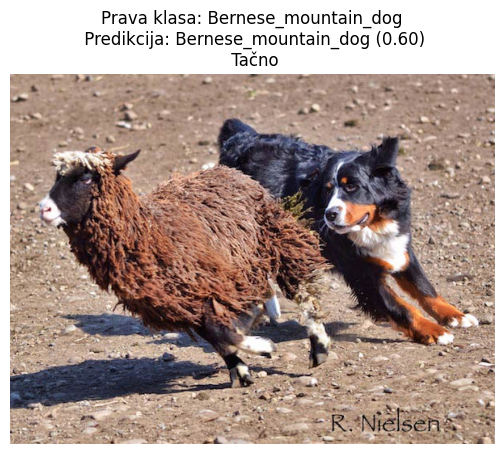

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


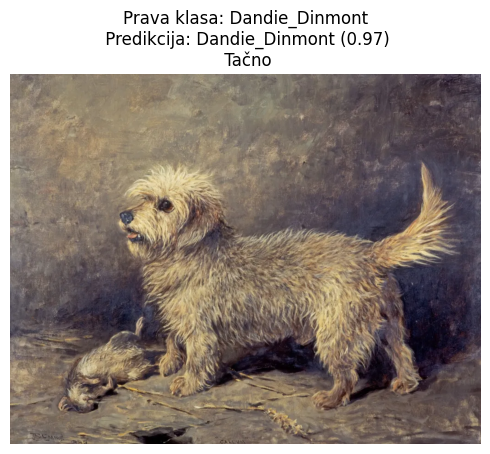

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


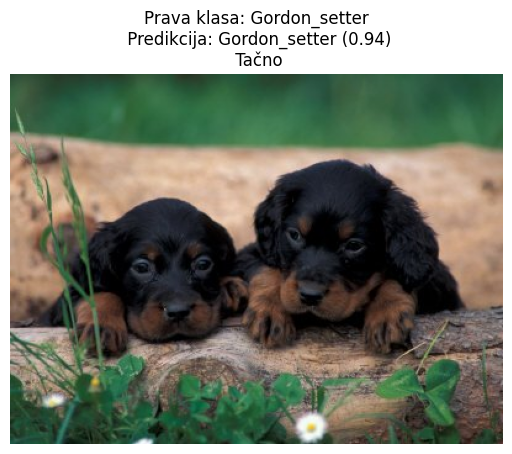

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


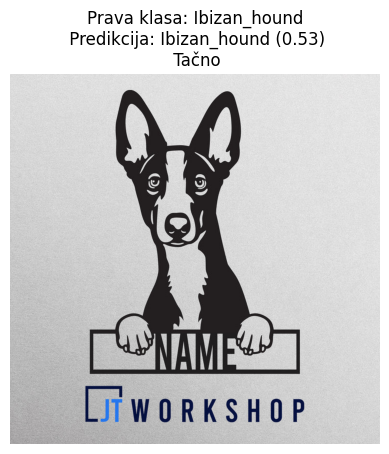

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


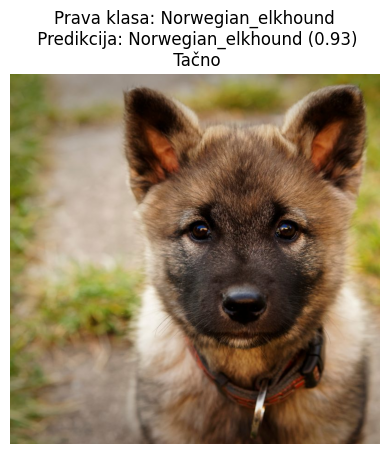

In [79]:
for breed,url in test_images.items():
  try:
    response=requests.get(url)
    img=Image.open(BytesIO(response.content)).convert('RGB')
    img_resized=img.resize((224,224))
    img_array=img_to_array(img_resized)
    img_array=np.expand_dims(img_array,axis=0)
    img_array=preprocess_input(img_array)

    prediction=model.predict(img_array)
    predicted_class=class_names[np.argmax(prediction)]
    probability=np.max(prediction)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prava klasa: {breed}\n Predikcija: {predicted_class} ({probability:.2f})\n {'Tačno' if predicted_class == breed else 'Pogrešno'}")
    plt.show()

  except Exception as e:
    print(f"Greška za rasu {breed}: {e}")

Pošto smo tesitrali model sa slikama sa interneta koje su različite u odnosu na slike iz *dataseta* možemo zaključiti da model radi jako dobar posao, čak odličan. I da je visoka verovatnoća pogađanja primenom modela na validacioni set slika rezultat malog broja slika u njemu i tome što su slike slične slikama iz trening skupa. I zbog toga što model koji je predtreniran i koji je korišćen za osnovu ovog projekta ima mnoštvo slika sa *imageneta* - primena *transfer learninga*. Ali ovde smo videli da model može da klasifikuje i nove slike sa interneta.

# Zaključak
Nakon pređenih teorijskih osnova vezanih za klasifikaciju slika i odrađenog praktičnog dela projekta mogu zaključiti da sam naučio mnogo u odnosu na ono što sam znao pre. Analizom smo utvrdili da ovaj *dataset* uz primenu *transfer learninga* omogućava kreiranje modela sa visokom stopom pogotka kojoj klasi slika pripada. Ta visoka tačnost je probudila određene sumnje u kvalitet modela ali dodatnim analizama utvrdili smo da nema ništa toliko loše u vezi modela i da je tolika stopa pogađanja možda i normalna za male *datasetove* kada se koristi *transfer learning*, što smo i na kraju dokazali uvozeći totalno drugačije slike sa interneta. Model je i u tim situacijama radio odličan posao.

# Literatura
Materijali koji su korišćeni kao pomoć pri izradi projektnog zadataka su:


*   Materijali sa vežbi - Vežbe 08
*   [Classification with MobileNetV2.ipynb - Colab](https://colab.research.google.com/drive/1bOzVaDQo8h6Ngstb7AcfzC35OihpHspt?usp=sharing)

*   [wget stackoverflow.com](https://stackoverflow.com/questions/25010369/wget-curl-large-file-from-google-drive/50670037#50670037)
*   [Find near duplicate and faked images](https://stackoverflow.com/questions/71514124/find-near-duplicate-and-faked-images)
*   [How to use model.predict properly when using my own image on the CNN model](https://stackoverflow.com/questions/74522477/how-to-use-model-predict-properly-when-using-my-own-image-on-the-cnn-model)
*   [How to Load and Manipulate Images for Deep Learning in Python With PIL/Pillow](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)
*   [Classifying images with MobileNetV2](https://pythontutorials.eu/deep-learning/image-classification/)
*   [How to Train MobileNetV2 On a Custom Dataset](https://blog.roboflow.com/how-to-train-mobilenetv2-on-a-custom-dataset/)





